# DS-7331 Machine Learning Project 2
## Airbnb Price Data - Classification and Regression Tasks
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

In [1]:
#loading libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics as mt

### Table of Contents

0. Background
<br>
1. Data Preparation (Data Preparation 1)
<br>
    1.1 Data Preparation before task-oriented data split
    <br>    
    1.2 Data Preparation for Classification Models (Data Preparation 2 Pt. 1)
    <br>
    1.3 Data Preparation for Regression Models (Data Preparation 2 Pt. 2)
    <br>
2. Modeling and Evaluation
<br>
    2.1 Evaluation Metrics (Model and Evaluation 1)
    <br>
    2.2 Method for Splitting train and test data (Model and Evaluation 2)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1 Classification
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2 Regression Models
        <br>
    2.3 Classification Models (Model and Evaluation 3 Pt. 1)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3.1 Random Forest
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3.2 KNN
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3.3 Logistic Regression
        <br>
    2.4 Regression Models (Model and Evaluation 3 Pt. 2)
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.4.1 LASSO
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.4.2 Random Forest
        <br>
    2.5 Comparison of Models (Model and Evaluation 4)
    <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.5.1 Classification Models
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.5.2 Regression Models
        <br>
    2.6 Advantages of Models (Model and Evaluation 5)
    <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.6.1 Classification Models
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.6.2 Regression Models
        <br>
     2.7 Comparison of Models (Model and Evaluation 4)
    <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.7.1 Classification Models
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.7.2 Regression Models
        <br>
3. Deployment
<br>
4. Exceptional Work


#### Background
We are using Airbnb data provided by Kaggle to estimate the price of Airbnb properties, as well as classifying the property type. In this project, we will perform two tasks: regression and classification.

For the regression, we will be using models such as Lasso Regression, Random Forest, and Extra Trees Regression to predict the price of a listing. We will assess these models by using MAPE, MAE, and RMSE.

For the classification, we will be using the Logistic Regression, KNN, and Random Forest to predict the property type of the listing. We will assess these models using accuracy, precision, recall, F1 score, and confusion matrix.

In [2]:
#setting path and loading data
pdata = pd.read_csv("airbnb.csv")

### 1. Data Preparation

#### 1.1 Data Preparation before task-oriented data split

In [3]:
#Define Class variables
pdata.info()

pdata.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-null

id                        74111
log_price                   767
property_type                35
room_type                     3
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73474
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74058
longitude                 73973
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
zipcode                     669
bedrooms                     11
beds                         18
dtype: int64

In [5]:
#Evaluating skewness
pdata.skew()
#Decided to make a cutoff for number_of_reviews, review_scores_rating, and beds because of outliers and non-normal data

id                     -0.260616
log_price               0.514695
accommodates            2.231561
bathrooms               3.691453
cleaning_fee           -1.059603
latitude               -0.534766
longitude              -0.407100
number_of_reviews       3.702835
review_scores_rating   -3.380861
bedrooms                1.989849
beds                    3.358000
dtype: float64

In [6]:
#Pre-Processing Methods
#removing outliers to reduce skewness of data 
z = pdata[pdata['number_of_reviews']> 100]
for i in list (z[z['number_of_reviews']> 100].index):
    pdata.loc[i,'number_of_reviews'] = 100
    
y = pdata[pdata['review_scores_rating']< 80]
for i in list (y[y['review_scores_rating']< 80].index):
    pdata.loc[i,'review_scores_rating'] = 80
    
x = pdata[pdata['beds']> 5]
for i in list (x[x['beds']> 5].index):
    pdata.loc[i,'beds'] = 5

In [7]:
#evaluating data for skewness after outlier transformation
pdata.skew()

id                     -0.260616
log_price               0.514695
accommodates            2.231561
bathrooms               3.691453
cleaning_fee           -1.059603
latitude               -0.534766
longitude              -0.407100
number_of_reviews       1.841134
review_scores_rating   -1.143345
bedrooms                1.989849
beds                    1.692681
dtype: float64

#### 1.2 Data Preperation for Classification Task

In [8]:
#dropping records with excess blank values, still had over 64k records to evaluate
pdata_cls = pdata.dropna()

In [9]:
#evaluating data for skewness after outlier transformation after splitting data based on task
pdata_cls.skew()

id                     -0.255823
log_price               0.377120
accommodates            2.119839
bathrooms               3.705744
cleaning_fee           -1.701312
latitude               -0.649299
longitude              -0.502707
number_of_reviews       1.268297
review_scores_rating   -1.155152
bedrooms                1.874469
beds                    1.539853
dtype: float64

To assist in predicting the property type of an Airbnb we decided to make a couple of changes to the features that could increase the predictability. 

We first collapsed the property type feature to only contain two distinct values, making this a binary classification problem. A property type could only be classified as Apartment or Other. This eliminated the smaller sub-types of a property such as, Loft, Condo, House, etc. We chose Apartment due to the large amounts of observations that were present in the data set and saw an increase in our accuracy (found at the end of this report)

Second, we decided to remove the longitude and latitude variables and replace them with a variable called region. This variable split the United States in half and classified the observation as either East or West. This increased the performance of our models and allowed us to reduce the number of predictors included in the models.

In [10]:
#transforming the property type to a binary classification
value_list = ["Apartment"]
boolean_series = ~pdata_cls.property_type.isin(value_list)
filtered_df = pdata_cls[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata_cls.loc[i,'property_type'] = "other"

#transforming the longitude and latitude variables to East / West
pdata_cls["region"] = pd.cut(pdata_cls.longitude,[-200,-100,0],2,labels=["West","East"])

In [11]:
#evaluating the data after transformation
pdata_cls.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,region
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,9/23/2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,East
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,9/14/2017,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,East
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,1/22/2017,38.925627,-77.034596,Columbia Heights,4,80.0,20009,0.0,1.0,East
5,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,...,9/5/2017,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,West
7,13971273,4.787492,other,Entire home/apt,2,1.0,Real Bed,moderate,True,LA,...,4/12/2017,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0,West


To help our model we encoded all of the boolean features that were originally stored as character fields to reflect actual boolean type variables and reflected true values with a 1 and false values with a 0.

We also encoded our response variable to 1 vs 2 to reflect Apartment vs Other.

In [12]:
#Encoding boolean and categorical variables
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                "property_type":     {"Apartment": 0, "other": 1},
                    }

pdata_cls=pdata_cls.replace(replaceStruct)

We proceeded to one hot encode the categorical variables that we were going to leave in our models. This created a reference variable (0) and allows us to interpret the coefficients of the variables easier.

We also evaluated the number of unique values found in the categorical variables, since hot-encoding the neighborhood attribute, which seemed useful in predicting property type in some cases, had 619 distinct values.  This made the model run time very slow and only gained a modest amount of accuracy.

We then dropped all of the other columns that would not be used in the proceeding models, like property descriptions, and those that resulted in a 0.0 coefficient value, lacking predictive power.

In [13]:
#evaluating categorical value count for one-hot-encoding
pdata_cls.nunique()

id                        42775
log_price                   643
property_type                 2
room_type                     3
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               42424
first_review               2489
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           77
host_since                 3000
instant_bookable              2
last_review                1100
latitude                  42758
longitude                 42734
neighbourhood               590
number_of_reviews           100
review_scores_rating         21
zipcode                     577
bedrooms                     11
beds                          6
region                        2
dtype: int64

In [14]:
#one hot encoding categorical variables and dropping columns that are not used
oneHotCols=["room_type","bed_type","city","cancellation_policy","region"]
pdata_cls.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','cleaning_fee','host_has_profile_pic'], axis=1, inplace=True)
pdata_cls=pd.get_dummies(pdata_cls, columns=oneHotCols,drop_first=True)
pdata_cls.head(10)

,log_price,property_type,accommodates,bathrooms,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,region_East
1,5.129899,0,7,1.0,0,1,6,93.0,3.0,3.0,...,0,0,0,1,0,0,1,0,0,1
2,4.976734,0,5,1.0,1,1,10,92.0,1.0,3.0,...,0,0,0,1,0,1,0,0,0,1
4,4.744932,0,2,1.0,1,1,4,80.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,1
5,4.442651,0,2,1.0,1,1,3,100.0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
7,4.787492,1,2,1.0,1,0,9,93.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,0
8,4.787492,1,2,1.0,0,0,100,99.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,0
10,4.605170,0,2,1.0,1,0,82,93.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
11,5.010635,1,4,1.5,1,0,29,97.0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0
13,5.298317,0,6,1.5,1,1,13,89.0,2.0,3.0,...,0,1,0,0,0,0,1,0,0,1
17,4.595120,1,2,2.0,1,0,12,88.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
# Creating the X and y variables for the Classification Model
X_cls = pdata_cls.drop('property_type',axis=1).values     
y_cls = pdata_cls['property_type'].values

#Scaling the Classification input
yhat_cls = np.zeros(y_cls.shape) # we will fill this with predictions
scl_cls = StandardScaler()
X_scaled_cls = scl_cls.fit_transform(X_cls)

In [16]:
#Describe the final dataset
pdata_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42775 entries, 1 to 74110
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   log_price                            42775 non-null  float64
 1   property_type                        42775 non-null  int64  
 2   accommodates                         42775 non-null  int64  
 3   bathrooms                            42775 non-null  float64
 4   host_identity_verified               42775 non-null  int64  
 5   instant_bookable                     42775 non-null  int64  
 6   number_of_reviews                    42775 non-null  int64  
 7   review_scores_rating                 42775 non-null  float64
 8   bedrooms                             42775 non-null  float64
 9   beds                                 42775 non-null  float64
 10  room_type_Private room               42775 non-null  uint8  
 11  room_type_Shared room       

#### 1.3 Data Preparation for Regression Models

In [17]:
#imputing missing numerical data by using the median, removing records with missing categorical values
pdata_reg = pdata.fillna(pdata.median())
pdata_reg = pdata_reg.dropna()

In [18]:
# evaluating data after imputing with median
pdata_reg.skew()

id                     -0.254923
log_price               0.381099
accommodates            2.129464
bathrooms               3.716646
cleaning_fee           -1.678508
latitude               -0.650879
longitude              -0.504401
number_of_reviews       1.276446
review_scores_rating   -1.162697
bedrooms                1.877781
beds                    1.546403
dtype: float64

To help our model we encoded all of the boolean features that were originally stored as character fields to reflect actual boolean type variables and reflected true values with a 1 and false values with a 0.

In [19]:
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                    }
pdata_reg=pdata_reg.replace(replaceStruct)
pdata_reg.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,...,1,9/23/2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,...,1,9/14/2017,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,...,1,1/22/2017,38.925627,-77.034596,Columbia Heights,4,80.0,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,1,SF,...,1,9/5/2017,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,2,1.0,Real Bed,moderate,1,LA,...,0,4/12/2017,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0


We proceeded to one hot encode the categorical variables that we were going to leave in our models. This created a reference variable (0) and allows us to interpret the coefficients of the variables easier.

Unlike our classification task, we did not make property_type a binary attribute, instead we allow all distinct property_types to be incorporated in the model.

In [20]:
#one hot encoding categorical variables and dropping columns that are not used
oneHotCols=["room_type","bed_type","city","cancellation_policy", "property_type"]
pdata_reg.drop(['description','host_response_rate','first_review','host_since', 'zipcode','last_review','id','neighbourhood','cleaning_fee','host_has_profile_pic'], axis=1, inplace=True)
pdata_reg=pd.get_dummies(pdata_reg, columns=oneHotCols,drop_first=True)
pdata_reg.head(10)

,log_price,accommodates,bathrooms,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
1,5.129899,7,1.0,0,1,40.766115,-73.989040,6,93.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,4.976734,5,1.0,1,1,40.808110,-73.943756,10,92.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4.744932,2,1.0,1,1,38.925627,-77.034596,4,80.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,4.442651,2,1.0,1,1,37.753164,-122.429526,3,100.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,4.787492,2,1.0,1,0,34.046737,-118.260439,9,93.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,4.787492,2,1.0,0,0,37.781128,-122.501095,100,99.0,1.0,...,0,0,0,0,0,0,0,0,0,0
10,4.605170,2,1.0,1,0,40.723883,-73.983880,82,93.0,1.0,...,0,0,0,0,0,0,0,0,0,0
11,5.010635,4,1.5,1,0,33.875862,-118.403293,29,97.0,2.0,...,0,0,0,0,0,0,0,0,0,0
13,5.298317,6,1.5,1,1,38.919630,-77.031189,13,89.0,2.0,...,0,0,0,0,0,0,0,0,0,0
17,4.595120,2,2.0,1,0,42.339194,-71.049672,12,88.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# create regression x and y 
X_reg = pdata_reg.drop('log_price',axis=1).values     
y_reg = pdata_reg['log_price'].values

#Scaling the x
yhat_reg = np.zeros(y_reg.shape) # we will fill this with predictions
scl_reg = StandardScaler()
X_scaled_reg = scl_reg.fit_transform(X_reg)

In [22]:
#Describing the final dataset for regression
pdata_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43320 entries, 1 to 74110
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   log_price                            43320 non-null  float64
 1   accommodates                         43320 non-null  int64  
 2   bathrooms                            43320 non-null  float64
 3   host_identity_verified               43320 non-null  int64  
 4   instant_bookable                     43320 non-null  int64  
 5   latitude                             43320 non-null  float64
 6   longitude                            43320 non-null  float64
 7   number_of_reviews                    43320 non-null  int64  
 8   review_scores_rating                 43320 non-null  float64
 9   bedrooms                             43320 non-null  float64
 10  beds                                 43320 non-null  float64
 11  room_type_Private room      

2. Modeling and Evaluation
    2.1 Evaluation Metrics
    2.2 Method for Splitting train and test data
        2.2.1 Classification
        2.2.2 Regression
    2.3 Classification Models
        2.3.1 Random Forest
        2.3.2 KNN
        2.3.3 Logistic Regression
    2.4 Regression Models
        2.4.1 LASSO
        2.4.2 Random Forest
    2.5 Comparison and Advantages of Models
        2.5.1 Advantages
        2.5.2 95% Confidence

### 2. Modeling and Evaluation

#### 2.1 Evaluation Metrics (Model and Evaluation 1)

Classification:
<br> 
&nbsp;&nbsp;&nbsp; Accuracy - Fraction of samples predicted correctly, mainly used in classification tasks. This can be highly misleading in unbalanced datasets. 
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Formula: ((TP+TN)/(TP+TN+FP+FN))
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [TP - True Positive, TN - True Negative, FP - False Positive, FN - False Negative]
<br>
&nbsp;&nbsp;&nbsp; Precision - Fraction of predicted positive events that are actually positive.
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Formula: ((TP)/(TP+FP))
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [TP - True Positive, FP - False Positive]
<br>
&nbsp;&nbsp;&nbsp; Recall - Fraction of positives that were predicted correctly.
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Formula: ((TP)/(TP+FN))
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [TP - True Positive, FN - False Negative]
<br>
&nbsp;&nbsp;&nbsp; F-Measure - Harmonized mean of recall and precision which is the best metric used for unbalanced classification tasks.
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Formula: (2(precision x recall)/(precision+recall))
<br>
&nbsp;&nbsp;&nbsp; Confusion Matrix - Table that enables us to visualizing the performance of the classification task. Since the accuracy can be misleading, this method allows us to determine how well the model classifies.
<br>
<br>
Why: The F1 metric is most suitable for classification task as we have an unbalanced dataset.
<br>
<br>
Regression:
<br>
&nbsp;&nbsp;&nbsp; MSE [Mean Squared Error] - The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset. Our goal is to minimize the mean squared error between predictions and expected values. Use MSE to train a model.
<br>
&nbsp;&nbsp;&nbsp; RMSE [Root Mean Squared Error] - The RMSE is an extension of MSE because it is the square root of MSE. RMSE determines the performance after testing the model(s) in cross-validation.
<br>
&nbsp;&nbsp;&nbsp; MAE [Mean Average Error] - The average of the absolute error from the predcited to the actual which helps us understand the magnitude of the error - not necessarily the direction.
<br>
&nbsp;&nbsp;&nbsp; MAPE [Mean Absolute Percent Error] - The measurement of how accurate a prediction is as a percentage.
<br>
<br>
Why: We looked at MAE, MAPE, and RMSE to compare accross models. Utlimately we decided to compare models based off of the MAE because of the ease of interpretablility.

#### 2.2 Method for Splitting train and test data (Model and Evaluation 2)

##### 2.2.1 Classification Task

We used stratified shuffle split in our classification data split because we have an unbalanced dataset and we want to ensure smaller classes are equally represented in our train/test splits.
A 10-fold cross-validation with an 80/20 train/test split was applied.

In [23]:
# create cross validation iterator
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, train_size = 0.8)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(X_scaled_cls,y_cls):
    # note that these are sparse matrices
    X_train_scaled_cls = X_scaled_cls[trainidx]
    X_test_scaled_cls = X_scaled_cls[testidx]
    y_train_cls = y_cls[trainidx]
    y_test_cls = y_cls[testidx]

In [24]:
#verifying the test vs train split
print("{0:0.2f}% data is in training set".format((len(X_train_scaled_cls)/len(pdata_cls.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test_scaled_cls)/len(pdata_cls.index)) * 100))

80.00% data is in training set
20.00% data is in test set


##### 2.2.2 Regression Task

We used a shuffle split in our regression data split because we have a continuous response variable. A 10-fold cross-validation with an 80/20 train/test split was applied.

In [25]:
# create cross validation iterator
from sklearn.model_selection import ShuffleSplit
cv_reg = ShuffleSplit(n_splits=10, test_size = 0.2, train_size = 0.8)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv_reg.split(X_scaled_reg,y_reg):
    # note that these are sparse matrices
    X_train_scaled_reg = X_scaled_reg[trainidx]
    X_test_scaled_reg = X_scaled_reg[testidx]
    y_train_reg = y_reg[trainidx]
    y_test_reg = y_reg[testidx]

In [26]:
#verifying the test vs train split
print("{0:0.2f}% data is in training set".format((len(X_train_scaled_reg)/len(pdata_reg.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test_scaled_reg)/len(pdata_reg.index)) * 100))

80.00% data is in training set
20.00% data is in test set


#### 2.3 Classification Models (Model and Evaluation 3 Pt. 1) - Random Forest, KNN, Logistic Regression

For each model we performed a Grid Search and/or Random Search to optimize the hyperparameters.

##### 2.3.1 Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Upload the Random Forest Classifier to the Grid Search
modelGRID_RFC = RandomForestClassifier()

#parameters_RFC = {'n_estimators' : [5,10,15,20,25,30,50,75,100,500],'max_features' : ['auto', 'sqrt', 'log2'],'max_depth' : [5,10,15,20,25,30,35,'None'],'min_samples_split' : [2,5,10],'min_samples_leaf' : [1,2,4],'bootstrap' : [True, False]}
#When ran, the optimal solution is: {'bootstrap': False,'max_depth': 15,'max_features': 'auto','min_samples_leaf': 2,'min_samples_split': 2,'n_estimators': 500}
#Therefore, we wanted to rerun the model with different estimators

parameters_RFC = {'n_estimators' : [5,100,500,1000],
                 'max_features' : ['auto', 'sqrt', 'log2'],
                 'max_depth' : [5,10,15,20,35,'None'],
                 'min_samples_split' : [2,3,4,5],
                 'min_samples_leaf' : [1,2,3,4],
                 'bootstrap' : [True, False]}

In [ ]:
#GridSearch
from sklearn.model_selection import GridSearchCV
gs_RFC = GridSearchCV(modelGRID_RFC, n_jobs = 25, param_grid=parameters_RFC,cv=3,scoring='accuracy')
gs_RFC.fit(X_train_scaled_cls, y_train_cls)

In [29]:
#Random Search CV for optimazation
from sklearn.model_selection import RandomizedSearchCV
rs_RFC = RandomizedSearchCV(estimator = modelGRID_RFC, param_distributions = parameters_RFC, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = 25,scoring='accuracy')
rs_RFC.fit(X_train_scaled_cls, y_train_cls)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done 150 out of 150 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=25,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 35,
                                                      'None'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [5, 100, 500, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
#parameter combination with the highest score for grid search
gs_RFC.best_params_

In [31]:
#parameter combination with the highest score for random search
rs_RFC.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [ ]:
modelFINAL_RFC_GS = RandomForestClassifier(gs_RFC.best_params_)
modelFINAL_RFC_GS.fit(X_train_scaled_cls, y_train_cls)
y_hat_RFC_GS = modelFINAL_RFC_GS.predict(X_test_scaled_cls)

In [55]:
modelFINAL_RFC_RS = RandomForestClassifier(n_estimators=500,
                                             min_samples_split = 4,
                                             min_samples_leaf= 2,
                                             max_features= 'auto',
                                             max_depth= 15,
                                             bootstrap= True)
modelFINAL_RFC_RS.fit(X_train_scaled_cls,y_train_cls)
y_hat_RFC_RS = modelFINAL_RFC_RS.predict(X_test_scaled_cls)

In [56]:
from sklearn.model_selection import cross_val_score
accuracies_RFC = cross_val_score(modelFINAL_RFC_RS, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(accuracies)

NameError: name 'accuracies' is not defined

In [ ]:
#Confusion Matrix for Random Forest Classifier w/ GridSearch
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(modelFINAL_RFC_GS.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, y_hat_RFC_GS),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,y_hat_RFC_GS))

print(classification_report(y_test_cls,y_hat_RFC_GS))

Training accuracy 0.835

Testing accuracy 0.763

Confusion Matrix


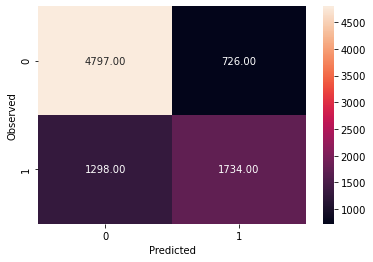

None
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      5523
           1       0.70      0.57      0.63      3032

    accuracy                           0.76      8555
   macro avg       0.75      0.72      0.73      8555
weighted avg       0.76      0.76      0.76      8555



In [34]:
#Confusion Matrix for Random Forest Classifier w/ RandomSearch
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(modelFINAL_RFC_RS.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, y_hat_RFC_RS),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,y_hat_RFC_RS))

print(classification_report(y_test_cls,y_hat_RFC_RS))

In [35]:
RF_ac = round(mt.accuracy_score(y_test_cls, y_hat_RFC_RS),ndigits=3)

print(RF_ac)

0.763


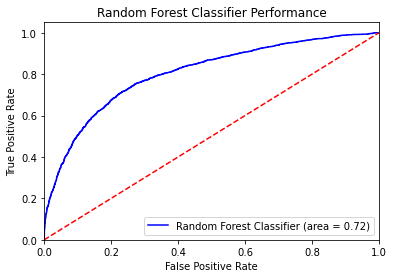

In [36]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(y_test_cls, modelFINAL_RFC_RS.predict(X_test_scaled_cls))
fpr, tpr, thresholds = roc_curve(y_test_cls, modelFINAL_RFC_RS.predict_proba(X_test_scaled_cls)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='blue', label='Random Forest Classifier (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier Performance')
plt.legend(loc="lower right")
plt.show()

##### 2.3.2 K-Nearest Neighbors Classification

In [30]:
get_ipython().run_line_magic('time', '')
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline


#pipe = make_pipeline(('scale', StandardScaler()),  ('knn', KNeighborsClassifier()))

pipe = Pipeline([('scale', StandardScaler()),  
                         ('knn', KNeighborsClassifier())]) 

# Define a range of hyper parameters for grid search
parameters = { 'knn__n_neighbors': [1,5,10,15,20,25,30,35,40,45,50]
              , 'knn__algorithm' : ["auto",  "ball_tree", "kd_tree", "brute"]
             }

#Perform the grid search using accuracy as a metric during cross validation.
gridKnn = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy') # can try f1_micro, f1_maco accuracy....

#Use the best features from recursive feature elimination during the grid search
gridKnn.fit(X_train_scaled_cls, y_train_cls)

#display the best pipeline model identified during the grid search
gridKnn.best_estimator_

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs


Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=45))])

# New

In [32]:
gridKnn.best_params_

{'knn__algorithm': 'auto', 'knn__n_neighbors': 45}

In [35]:
#Logistic Regression
KNNmodelFINAL = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 45) # get object
KNNmodelFINAL.fit(X_train_scaled_cls, y_train_cls)
KNNy_hat = KNNmodelFINAL.predict(X_test_scaled_cls)

In [36]:
from sklearn.model_selection import cross_val_score
KNNaccuracies = cross_val_score(KNNmodelFINAL, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(KNNaccuracies)

[0.74330801 0.75078901 0.74295733 0.74517826 0.7421391  0.74260666
 0.74669784 0.74529515 0.74798364 0.74891876]


Training accuracy 0.754

Testing accuracy 0.744

Confusion Matrix


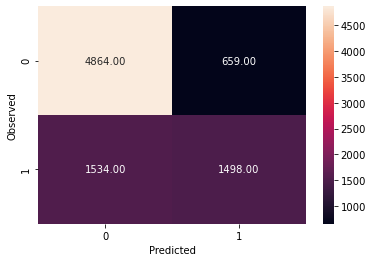

None
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5523
           1       0.69      0.49      0.58      3032

    accuracy                           0.74      8555
   macro avg       0.73      0.69      0.70      8555
weighted avg       0.74      0.74      0.73      8555



In [37]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(KNNmodelFINAL.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,KNNy_hat))

print(classification_report(y_test_cls,KNNy_hat))

In [40]:
KNN_ac = round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3)

print(KNN_ac)

0.744


##### 2.3.3 Logistic Regression 

In [44]:
#run a grid search to evaluate the parameters as part of hyperparameter tuning
modelGRID = LogisticRegression()

parameters = {'penalty': ['l2'],
             'C': [.001,.75,10],
             'solver': ['newton-cg','liblinear','sag','saga'],
              'max_iter':[100],
              'class_weight': ['balanced']
            }

In [ ]:
#identify the best parameters as determined by our grid search accuracy results
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(modelGRID,n_jobs=25,param_grid=parameters,cv=10,scoring='accuracy')
gs.fit(X_train_scaled_cls, y_train_cls)

In [ ]:
#mean test score values associated with each grid search parameter combination 
params = gs.cv_results_['params']
result = gs.cv_results_['mean_test_score']
for params,result in zip(params, result):
    print(params, 'has an accuracy of', round(result,ndigits=2))

In [ ]:
#parameter combination with the highest score
gs.best_params_

In [53]:
#Logistic Regression
modelFINAL = LogisticRegression(penalty='l2', C=.75, class_weight='balanced', solver='newton-cg' ) # get object
modelFINAL.fit(X_train_scaled_cls, y_train_cls)
y_hat = modelFINAL.predict(X_test_scaled_cls)

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(modelFINAL, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(accuracies)

[0.71127995 0.70660432 0.70952659 0.71209819 0.70718878 0.71630625
 0.72004676 0.70707189 0.7131502  0.71934541]


Training accuracy 0.715

Testing accuracy 0.71

Confusion Matrix


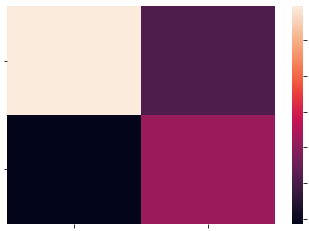

None
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      5523
           1       0.58      0.69      0.63      3032

    accuracy                           0.71      8555
   macro avg       0.69      0.71      0.70      8555
weighted avg       0.73      0.71      0.71      8555



In [49]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(modelFINAL.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, y_hat),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,y_hat))

print(classification_report(y_test_cls,y_hat))

In [50]:
LOG_ac = round(mt.accuracy_score(y_test_cls, y_hat),ndigits=3)

print(LOG_ac)

0.71


In [82]:
#coefficient output based on in-class example
weights = modelFINAL.coef_.T
x = pd.DataFrame(pdata_cls)
variable_names = x.columns
for coef,name in zip(weights, variable_names):
    print(name, 'has weight of', round(coef[0],ndigits=2))

log_price has weight of -0.1
property_type has weight of 0.12
accommodates has weight of 0.35
bathrooms has weight of -0.05
host_identity_verified has weight of -0.02
instant_bookable has weight of 0.09
number_of_reviews has weight of 0.14
review_scores_rating has weight of 0.23
bedrooms has weight of 0.14
beds has weight of 0.53
room_type_Private room has weight of 0.08
room_type_Shared room has weight of -0.01
bed_type_Couch has weight of 0.03
bed_type_Futon has weight of 0.02
bed_type_Pull-out Sofa has weight of 0.06
bed_type_Real Bed has weight of -0.06
city_Chicago has weight of 0.16
city_DC has weight of 0.22
city_LA has weight of -0.43
city_NYC has weight of 0.08
city_SF has weight of 0.0
cancellation_policy_moderate has weight of -0.05
cancellation_policy_strict has weight of -0.03
cancellation_policy_super_strict_30 has weight of 0.11
cancellation_policy_super_strict_60 has weight of -0.25


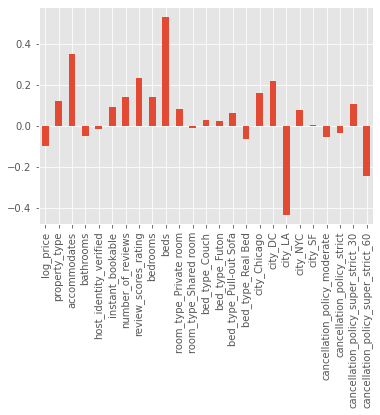

In [83]:
#coeffient plot from class example

from matplotlib import pyplot as pyplot
%matplotlib inline
variable_names = list(pdata_cls)[0:-1]
plt.style.use('ggplot')

weights = pd.Series(modelFINAL.coef_[0],index=variable_names)
weights.plot(kind='bar')
plt.show()

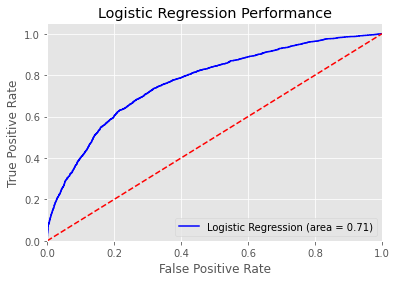

In [84]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(y_test_cls, modelFINAL.predict(X_test_scaled_cls))
fpr, tpr, thresholds = roc_curve(y_test_cls, modelFINAL.predict_proba(X_test_scaled_cls)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Performance')
plt.legend(loc="lower right")
plt.show()

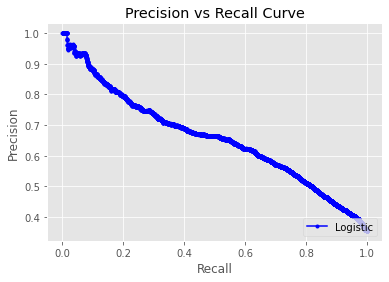

In [85]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

log_roc_auc = roc_auc_score(y_test_cls, modelFINAL.predict(X_test_scaled_cls))
lr_precision, lr_recall, _ = precision_recall_curve(y_test_cls, modelFINAL.predict_proba(X_test_scaled_cls)[:,1])

plt.figure()
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic',color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve')
plt.legend(loc="lower right")
#plt.savefig('Log_PR')
plt.show()

#### 2.4 Regression Models (Model and Evaluation 3 Pt. 2)

##### 2.4.1 LASSO Regression

In [ ]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso
from sklearn.base import BaseEstimator, RegressorMixin

reg = Lasso(alpha=.001, selection = 'cyclic', warm_start = 'True', random_state=42)

#Test parameters 
alpha = [0.001, 0.1, 1, 10]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=25 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   )

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_scaled_reg, y_reg)

In [87]:
regGridSearch.best_params_

{'alpha': 0.001, 'selection': 'cyclic', 'warm_start': True}

In [47]:
reg = Lasso(alpha=.001, selection = 'cyclic', warm_start = 'True', random_state=42)
reg.fit(X_train_scaled_reg, y_train_reg)
print ("Lasso model:", (reg.coef_))
#EvaluateRegressionEstimator(regEstimator, X_scaled_reg, y_reg, cv_reg)

Lasso model: [ 0.13886417  0.07989095  0.00613567 -0.01884656  0.05069202 -0.
 -0.01293571  0.06012899  0.11489524 -0.00608627 -0.30136051 -0.16775198
  0.00401875 -0.00224841  0.00270477  0.00882768 -0.07430126 -0.01319004
 -0.          0.00070979  0.0974929   0.00350816  0.02510461  0.01378282
  0.00929392  0.00932364  0.00399428  0.00364732 -0.0022441  -0.00390258
 -0.00880302  0.00386962  0.00089068 -0.          0.01657504 -0.02268386
  0.         -0.00402517 -0.00716565 -0.02159454 -0.02016424 -0.00418985
 -0.00962535  0.02084494  0.00111727  0.00289162 -0.00631403  0.00933417
  0.0004084  -0.00183283  0.0029954   0.00105264  0.00301727  0.00364879
 -0.00048501]


In [48]:
print(reg.score(X_train_scaled_reg, y_train_reg))
print(reg.score(X_test_scaled_reg, y_test_reg))

0.6184515481540063
0.6200759993696978


In [49]:
#coefficient output based on in-class example
weights_reg = reg.coef_.T
variable_names = list(pdata_reg)[0:-1]

#x = pd.DataFrame(pdata_reg)
#variable_names_reg = x.columns
for coef,name in zip(weights_reg, variable_names):
    print(name, 'has weight of', round(coef, ndigits=2))

log_price has weight of 0.14
accommodates has weight of 0.08
bathrooms has weight of 0.01
host_identity_verified has weight of -0.02
instant_bookable has weight of 0.05
latitude has weight of -0.0
longitude has weight of -0.01
number_of_reviews has weight of 0.06
review_scores_rating has weight of 0.11
bedrooms has weight of -0.01
beds has weight of -0.3
room_type_Private room has weight of -0.17
room_type_Shared room has weight of 0.0
bed_type_Couch has weight of -0.0
bed_type_Futon has weight of 0.0
bed_type_Pull-out Sofa has weight of 0.01
bed_type_Real Bed has weight of -0.07
city_Chicago has weight of -0.01
city_DC has weight of -0.0
city_LA has weight of 0.0
city_NYC has weight of 0.1
city_SF has weight of 0.0
cancellation_policy_moderate has weight of 0.03
cancellation_policy_strict has weight of 0.01
cancellation_policy_super_strict_30 has weight of 0.01
cancellation_policy_super_strict_60 has weight of 0.01
property_type_Bed & Breakfast has weight of 0.0
property_type_Boat has

When alpha is .001 as dictated by the grid search the predictions seem more aligned to the actuals

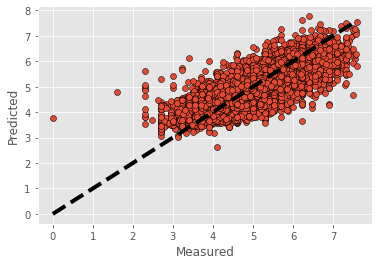

In [91]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(reg, X_scaled_reg, y_reg, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_reg, predicted, edgecolors=(0, 0, 0))
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [92]:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
from sklearn.metrics import mean_squared_error
round(mean_squared_error(y_test_reg, reg.predict(X_test_scaled_reg)), ndigits=2)

0.17

When the alpha is .05, at the 95% confidence interval, the prediction MSE is higher

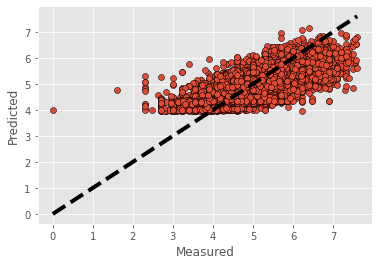

In [93]:
reg_05 = Lasso(alpha=.05, selection = 'cyclic', warm_start = 'True', random_state=42)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(reg_05, X_scaled_reg, y_reg, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_reg, predicted, edgecolors=(0, 0, 0))
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [94]:
reg_05.fit(X_train_scaled_reg, y_train_reg)
print(reg_05.score(X_train_scaled_reg, y_train_reg))
print(reg_05.score(X_test_scaled_reg, y_test_reg))

0.5677487564761738
0.564327611345425


In [95]:
round(mean_squared_error(y_test_reg, reg_05.predict(X_test_scaled_reg)), ndigits=2)

0.2

 Trying a different way

In [96]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train_scaled_reg, y_train_reg)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_scaled_reg, y_train_reg)
mean_squared_error(y_test_reg, lasso.predict(X_test_scaled_reg))

0.1733216148266688

In [97]:
#coefficient output based on in-class example
weights_reg = lasso.coef_.T
variable_names = list(pdata_reg)[0:-1]

#x = pd.DataFrame(pdata_reg)
#variable_names_reg = x.columns
for coef,name in zip(weights_reg, variable_names):
    print(name, 'has weight of', round(coef, ndigits=2))

log_price has weight of 0.14
accommodates has weight of 0.08
bathrooms has weight of 0.01
host_identity_verified has weight of -0.02
instant_bookable has weight of 0.1
latitude has weight of -0.06
longitude has weight of -0.01
number_of_reviews has weight of 0.06
review_scores_rating has weight of 0.12
bedrooms has weight of -0.01
beds has weight of -0.3
room_type_Private room has weight of -0.17
room_type_Shared room has weight of 0.0
bed_type_Couch has weight of -0.0
bed_type_Futon has weight of 0.0
bed_type_Pull-out Sofa has weight of 0.01
bed_type_Real Bed has weight of -0.09
city_Chicago has weight of -0.0
city_DC has weight of -0.0
city_LA has weight of 0.01
city_NYC has weight of 0.08
city_SF has weight of 0.0
cancellation_policy_moderate has weight of 0.02
cancellation_policy_strict has weight of 0.02
cancellation_policy_super_strict_30 has weight of 0.01
cancellation_policy_super_strict_60 has weight of 0.01
property_type_Bed & Breakfast has weight of 0.0
property_type_Boat ha

##### 2.4.2 Random Forest Regression

In [100]:
#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               } 

In [101]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

In [ ]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
#rmse_scorer = mean_squared_error(score_func=rmse, greater_is_better=False)
#mape_scorer = mean_absolute_error(score_func=mape, greater_is_better=False)

linreg = RandomForestRegressor()
parameters = {'min_samples_split':[5,10],
             'n_estimators':[100],
             'min_samples_leaf':[1,5],
             'criterion':['mae'],
             'n_jobs':[14],
             'random_state':[0],
             'max_depth':[2]}

from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                            , n_jobs=14
                            , verbose=1
                            ,param_grid=parameters
                            ,cv=cv_reg
                            ,scoring=mae_scorer)

regGridSearch.fit(X_train_scaled_reg, y_train_reg)

In [ ]:
#Display the best estimator parameters
regGridSearch.best_estimator_

In [ ]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

regEstimator = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None, max_features='auto',
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=10, min_samples_split=5, min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=14, oob_score=False, random_state=0, verbose=0, warm_start=False)

EvaluateRegressionEstimator(regEstimator, X_train_scaled_reg, y_train_reg, cv_reg)

Extra Trees Regression

In [ ]:
cv = ShuffleSplit(n_splits=3, test_size = 0.1, train_size = 0.2)

for train, test in cv.split(X_scaled_reg,y_reg):
    # note that these are sparse matrices
    X_train_scaled_reg = X_scaled_reg[trainidx]
    X_test_scaled_reg = X_scaled_reg[testidx]
    y_train_reg = y_reg[trainidx]
    y_test_reg = y_reg[testidx]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

extReg = RandomForestRegressor()
parameters = {'min_samples_split':[2,5],
             'n_estimators':[100],
             'min_samples_leaf':[10,25],
             'criterion':['mae'],
             'n_jobs':[-1],
             'random_state':[0]}

from sklearn.model_selection import GridSearchCV
extGridSearch = GridSearchCV(estimator=extReg
                            , n_jobs=-1
                            , verbose=1
                            ,param_grid=parameters
                            ,cv=cv_reg
                            ,scoring=mae_scorer)

extGridSearch.fit(X_train_scaled_reg, y_train_reg),

In [ ]:
#Display the best estimator parameters
extGridSearch.best_best_estimator_

#Might need to change to .best_estimator_

In [ ]:
#Create a regression estimator with best parameters for cross validation
bestEstimator = regGridSearch.best_best_Estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(bestEstimator, X_test_scaled_reg, y_test_reg, cv)

#### 2.5 Comparison of Models (Model and Evaluation 4)

##### 2.5.1 Classification Models

In [69]:
class_acc = pd.DataFrame({'Model':['Random Forest','KNN','Logistic Regression'], 'Accuracy':[RF_ac,KNN_ac,LOG_ac]})

class_acc.head()

,Model,Accuracy
0,Random Forest,0.754
1,KNN,0.744
2,Logistic Regression,0.710


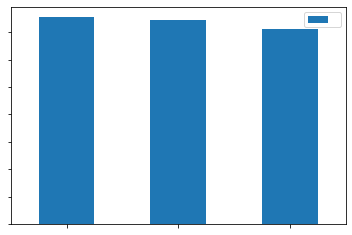

In [71]:
class_acc.plot.bar(x='Model', y='Accuracy', rot=0)

After comparing the performance of all three classification models Random Forest performed best with an F1 accuracy of .754. This model ran fast and perfomed best when compared to the other classification models, making it a good candidate for future exploration and refinment. Though both KNN and Logistic Regression perfomed almost as well as Random Forest, the recall and precision for the models saw a slight drop while runtime increased.

##### 2.5.2 Regression Models

#### 2.6 Advantages of Models (Model and Evaluation 5)

##### 2.6.1 Classification Models

##### 2.6.2 Regression Models

#### 2.7 Attribute Importance

##### 2.7.1 Classification Models

In [40]:
#Random Forest Classification
RFweights = modelFINAL_RFC_RS.feature_importances_
x = pd.DataFrame(pdata_cls)
variable_names = x.columns

RFweights_df=pd.DataFrame(RFweights)
variable_names_df=pd.DataFrame(variable_names)
variable_names_df=variable_names_df.drop([1])
variable_names_df=variable_names_df.reset_index(drop=True)

In [42]:
RF_class_weights = pd.concat([RFweights_df, variable_names_df],axis=1)
names = ["Weight", "Feature Name"]
RF_class_weights.columns = names
RF_class_weights.sort_values(by=['Weight'])

,Weight,Feature Name
23,0.000033,cancellation_policy_super_strict_60
11,0.000469,bed_type_Couch
22,0.000621,cancellation_policy_super_strict_30
13,0.001363,bed_type_Pull-out Sofa
12,0.001539,bed_type_Futon
10,0.004079,room_type_Shared room
14,0.004276,bed_type_Real Bed
15,0.007993,city_Chicago
19,0.011756,city_SF
20,0.012719,cancellation_policy_moderate


For Random Forest Classification the top 5 most important features were: log_pirce, city_NYC, number_of_reviews, bathrooms, and region_East. These features are intuitive as the location, and bathrooms would certainly seem to influence the property type.

In [139]:
#Logistic Regression
weights = modelFINAL.coef_.T
x = pd.DataFrame(pdata_cls)
variable_names = x.columns
for coef,name in zip(weights, variable_names):
    print(name, 'has weight of', round(coef[0],ndigits=2))

log_price has weight of -0.1
property_type has weight of 0.1
accommodates has weight of 0.35
bathrooms has weight of -0.05
host_identity_verified has weight of -0.01
instant_bookable has weight of 0.09
number_of_reviews has weight of 0.14
review_scores_rating has weight of 0.24
bedrooms has weight of 0.16
beds has weight of 0.53
room_type_Private room has weight of 0.08
room_type_Shared room has weight of -0.02
bed_type_Couch has weight of 0.03
bed_type_Futon has weight of 0.02
bed_type_Pull-out Sofa has weight of 0.05
bed_type_Real Bed has weight of -0.04
city_Chicago has weight of 0.17
city_DC has weight of 0.23
city_LA has weight of -0.41
city_NYC has weight of 0.07
city_SF has weight of -0.0
cancellation_policy_moderate has weight of -0.06
cancellation_policy_strict has weight of -0.04
cancellation_policy_super_strict_30 has weight of 0.12
cancellation_policy_super_strict_60 has weight of -0.26


Logistic Regression weighs different features more important than Random Forest did. We find that the number of Beds, the City of LA, the accommodation, and the city of DC are most important for Logistic Regression. 

##### 2.7.2 Regression Models

In [50]:
#LASSO
weights_reg = reg.coef_.T
variable_names = list(pdata_reg)[0:-1]

#x = pd.DataFrame(pdata_reg)
#variable_names_reg = x.columns
for coef,name in zip(weights_reg, variable_names):
    print(name, 'has weight of', round(coef, ndigits=2))

log_price has weight of 0.14
accommodates has weight of 0.08
bathrooms has weight of 0.01
host_identity_verified has weight of -0.02
instant_bookable has weight of 0.05
latitude has weight of -0.0
longitude has weight of -0.01
number_of_reviews has weight of 0.06
review_scores_rating has weight of 0.11
bedrooms has weight of -0.01
beds has weight of -0.3
room_type_Private room has weight of -0.17
room_type_Shared room has weight of 0.0
bed_type_Couch has weight of -0.0
bed_type_Futon has weight of 0.0
bed_type_Pull-out Sofa has weight of 0.01
bed_type_Real Bed has weight of -0.07
city_Chicago has weight of -0.01
city_DC has weight of -0.0
city_LA has weight of 0.0
city_NYC has weight of 0.1
city_SF has weight of 0.0
cancellation_policy_moderate has weight of 0.03
cancellation_policy_strict has weight of 0.01
cancellation_policy_super_strict_30 has weight of 0.01
cancellation_policy_super_strict_60 has weight of 0.01
property_type_Bed & Breakfast has weight of 0.0
property_type_Boat has

LASSO weighed room_type_private, review_scores_rating, accommodates, and number_of_reviews as the top predictors for the price of an Airbnb property. All of these predictors would surely have an influence on the price.

In [ ]:
#Random Forest Regression
RFweights_reg = modelFINAL_RFC_RS.feature_importances_
x = pd.DataFrame(pdata_reg)
variable_names_reg = x.columns

RFweights_reg_df=pd.DataFrame(RFweights_reg)
variable_names_reg_df=pd.DataFrame(variable_names_reg)
variable_names_reg_df=variable_names_reg_df.drop([1])
variable_names_reg_df=variable_names_reg_df.reset_index(drop=True)

In [ ]:
RF_class_weights_reg = pd.concat([RFweights_reg_df, variable_names_reg_df],axis=1)
names = ["Weight", "Feature Name"]
RF_class_weights_reg.columns = names
RF_class_weights_reg.sort_values(by=['Weight'])

#### 3. Deployment

Airbnb would be interested in our regression models because they can recommend a price to property owners for new listings in the service. The models can be improved upon with internal resources at Airbnb but knowing there is a possibility to predict the price of a listing, with the little information we had, would be insightful to determining price gouging. Airbnb has received negative critiques on the service’s price range for certain areas of the country.
<br>
<br>
The classification models would be useful because there are 35 different property types in the dataset we found, so this model could streamline the classifications so users can filter easier when searching for a listing to stay in. If more data were available for us to use, we could have created multinominal classification models.
<br>
<br>
Deploying the regression model would need to be an internal use so they can see how property owners are pricing their listings. The classification model would need to be added to their front-end development team to create a custom filter that can iterate through all the listings and classify them.
<br>
<br>
More data is necessary for delivering effective predictions. Having more information around the physical features of the property such as square footage would alter the predictive power of the models.
<br>
<br>
The models would need to be updated regularly to stay current on all new properties rolling out and new stays are being booked. Especially when prices change over time with correspondence to the trip a user is planning.

#### 4. Exceptional Work Explained